### ***California Housing Price Prediction***

In [1]:
# import important packages

In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations and working with arrays/matrices
import pandas as pd  # For data manipulation and analysis, especially tabular data
import matplotlib.pyplot as plt  # For data visualization; provides low-level plotting functionalities
import seaborn as sns  # For advanced data visualization; builds on matplotlib with easier-to-use, aesthetically pleasing charts
import sklearn  # Machine learning library with a variety of tools for model building, evaluation, and preprocessing
import os  # For interacting with the operating system, e.g., reading from or writing to files and directories


In [3]:
os.environ['KAGGLE_USERNAME'] ='Zunaira_Nureen'
os.environ['KAGGLE_KEY'] = '804a20be7d797c8a2a8e58da41d5752a'

In [4]:
! kaggle datasets download camnugent/california-housing-price

403 - Forbidden - Permission 'datasets.get' was denied


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 40.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [6]:
import pandas as pd
import os

# Define the path to the dataset files
data_path = '/root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1'

# List files in the dataset directory
print("Files in dataset directory:")
print(os.listdir(data_path))

# Load the CSV file (assuming the main file is named 'housing.csv')
file_name = 'housing.csv'  # Replace with actual file name if different
file_path = os.path.join(data_path, file_name)

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

Files in dataset directory:
['housing.csv']
First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


# **Exploratory data analysis**

In [7]:
# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Check the structure and summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there are 20640 total instances & total_bedrooms has only 20433 non_null values(207 values missing)

In [9]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


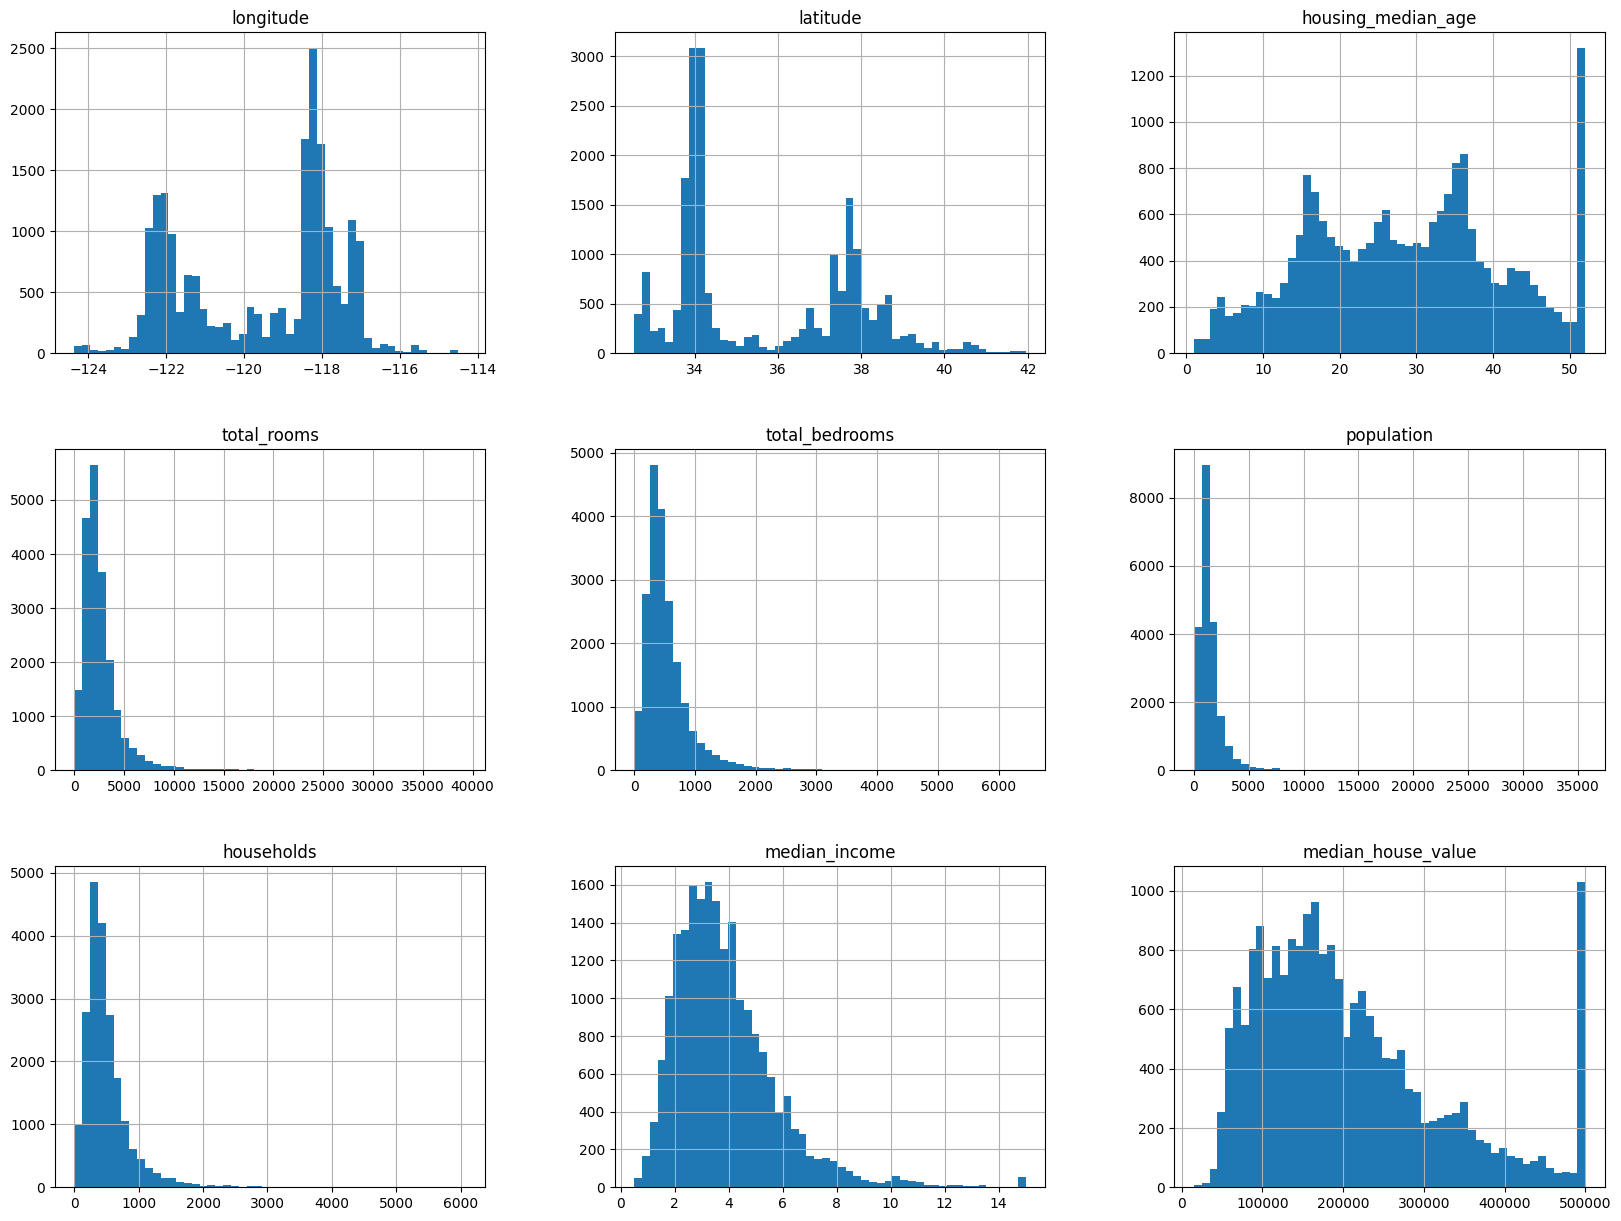

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

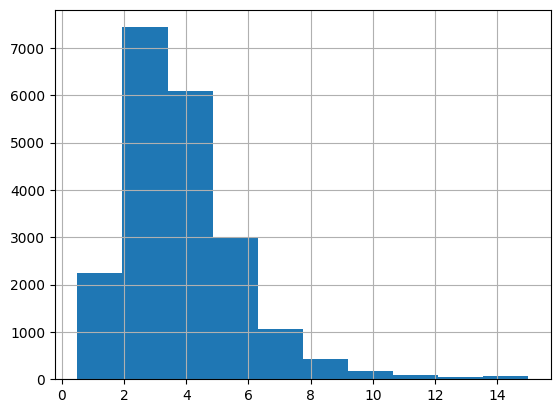

In [12]:
# median income look like important feature
df['median_income'].hist()

In [13]:
# dividing the income_category to limit the number income category
df['income_category']=np.ceil(df['median_income']/1.5)
# putting everytging above 5th category as 5th category
df['income_category'].where(df['income_category']<5,other=5,inplace=True)

<ipython-input-13-53fae0b772ac>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_category'].where(df['income_category']<5,other=5,inplace=True)


In [14]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit instance to split the dataset.
# `n_splits=1` means only one split will be created.
# `test_size=0.2` indicates 20% of the data will be used for the test set.
# `random_state=42` ensures reproducibility of the results.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split. The split is stratified based on the 'income_category' column,
# ensuring that both train and test sets have similar distributions of income categories.
for train_index, test_index in split.split(df, df['income_category']):
    # Select rows for the training set based on the generated indices.
    strat_train_set = df.loc[train_index]
    # Select rows for the test set based on the generated indices.
    strat_test_set = df.loc[test_index]

In [16]:
df['income_category'].value_counts()/len(df)

,count
income_category,
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


In [17]:
strat_test_set['income_category'].value_counts()/len(strat_test_set)

,count
income_category,
3.0,0.350533
2.0,0.318798
4.0,0.176357
5.0,0.114341
1.0,0.039971


**As seen above the proportions are mentioned in the test set using stratified sampling**

**[why stratified?]** **:** because the feature-space are less and also because its a mid-sized dataset & we don't want to miss any class.

In [18]:
# Experimenting with random sampling

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [19]:
def income_category_proportions(data):
    # This function calculates the proportion of each income category in the given dataset.
    return data['income_category'].value_counts() / len(data)

# Create a DataFrame to compare income category proportions between the overall dataset,
# stratified test set, and a randomly split test set.
comparing_proportions = pd.DataFrame({
    "Overall": income_category_proportions(df),             # Proportions in the entire dataset
    "startified": income_category_proportions(strat_test_set), # Proportions in the stratified test set
    "random": income_category_proportions(test_set)          # Proportions in a randomly split test set
}).sort_index()                                              # Sort by income category for easy comparison

# Calculate the percentage error in proportions for the random test set relative to the overall dataset
comparing_proportions['random_%error'] = 100 * comparing_proportions['random'] / comparing_proportions['Overall'] - 100

# Calculate the percentage error in proportions for the stratified test set relative to the overall dataset
comparing_proportions['startified_%error'] = 100 * comparing_proportions['startified'] / comparing_proportions['Overall'] - 100


In [20]:
comparing_proportions

,Overall,startified,random,random_%error,startified_%error
income_category,,,,,
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [21]:
for items in (strat_train_set,strat_test_set):
   items.drop('income_category',axis=1,inplace=True)

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [23]:
housing= strat_train_set.copy()

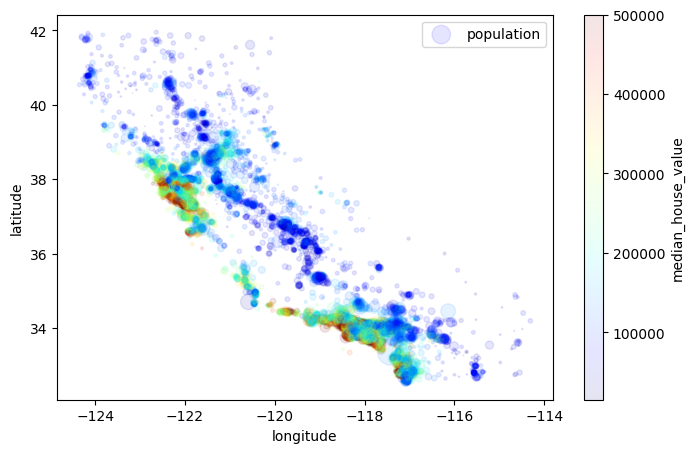

In [24]:
# Create a scatter plot to visualize geographical data in the stratified training set.
housing.plot(
    kind='scatter',                           # Set the plot type to scatter
    x='longitude',                            # Longitude on the x-axis
    y='latitude',                             # Latitude on the y-axis
    alpha=0.1,                                # Set transparency of points to 0.1 for better visibility of dense areas
    s=housing['population'] / 100,  # Set the size of points based on population, scaled down by a factor of 100
    label='population',                       # Label for the scatter points, indicating what they represent
    figsize=(8,5),                          # Set the figure size to 12x8 inches
    c='median_house_value',                   # Color points based on median house value
    cmap=plt.get_cmap('jet'),                 # Use the 'jet' color map to vary color by house value
    sharex=False                              # Ensure x-axis is not shared with other subplots if they exist
)

plt.legend()
plt.show()

# **Looking for correlation**




In [25]:
# pandas has corr method for calculating correlation
# Assuming 'housing' is your DataFrame

# Select only numerical features for correlation calculation
numerical_features = housing.select_dtypes(include=np.number).columns
corr_matrix = housing[numerical_features].corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


its always between 1(high correlated) and -1(less correlated)

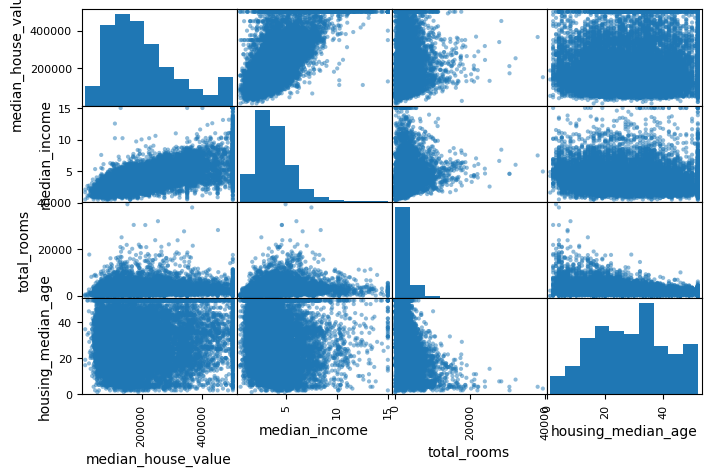

In [26]:
# other approach to use the scatter plot
from pandas.plotting import scatter_matrix
imp_attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[imp_attributes],figsize=(8,5))
plt.show()

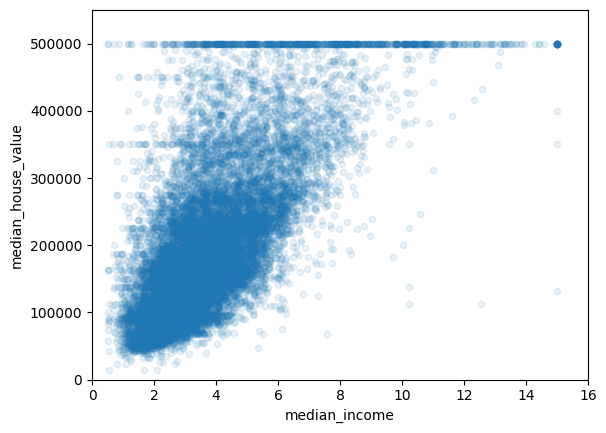

In [27]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
plt.axis([0,16,0,550000])
plt.show()

# **Features Engineering**

In [28]:
# Calculate the ratio of bedrooms to total rooms for each housing unit.
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
# Calculate the average number of rooms per household.
housing['rooms_per_household']=housing['total_rooms']/housing['households']
# Calculate the average number of people per household.
housing['population_per_household']=housing['population']/housing['households']

In [29]:
numerical_features=housing.select_dtypes(include=np.number).columns
corr_matrix=housing[numerical_features].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


**Observation:** the new bedroom_per_room is highly correlated but in a reciprocative way to the median house value, so the houses with lesser bedroom/room ratio will tend to be more expensive

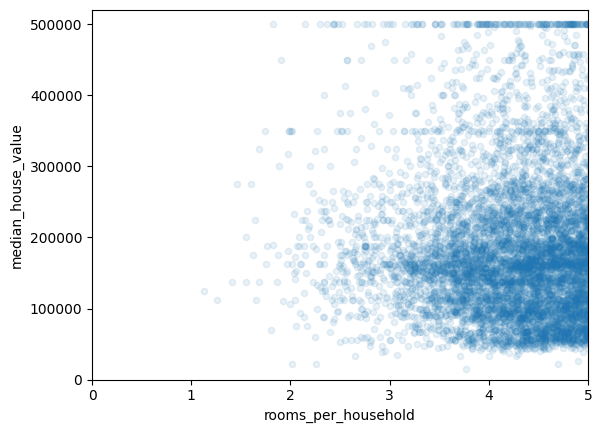

In [32]:
housing.plot(kind='scatter',x='rooms_per_household',y='median_house_value',alpha=0.1)
plt.axis([0,5,0,520000])
plt.show()

there is coorelation between medians_house_value and rooms_per_household, basically the lesser the rooms_per_household, the more the median_house_value.

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,0.212873,5.440406,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,0.057378,2.611696,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.100000,1.130435,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,0.175304,4.442168,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,0.203027,5.232342,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,0.239816,6.056361,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,1.000000,141.909091,1243.333333


# **Preparing the data for ML algos**



In [57]:
# Create a new DataFrame 'Housing' by dropping the 'median_house_value' column from the stratified training set
Housing = strat_train_set.drop('median_house_value', axis=1)

# Create a separate Series 'Housing_labels' that contains only the 'median_house_value' column,
# which will be used as the target variable (labels) for training the model
Housing_labels = strat_train_set['median_house_value'].copy()


In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  bedrooms_per_room         16354 non-null  float64
 11  rooms_per_household       16512 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


In [60]:
# when using scikit-learn's Imputer class
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [62]:
Housing_num=Housing.drop('ocean_proximity',axis=1)

In [63]:
imputer.fit(Housing_num)

SimpleImputer(strategy='median')

In [65]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [67]:
Housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

using the imputer we created above, transforming the training set by replacing the missing values with the learned medians

In [71]:
x= imputer.transform(Housing_num)

In [72]:
Housing_train = pd.DataFrame(x, columns=Housing_num.columns)

In [74]:
Housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [75]:
Housing_train[Housing_train.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


***Handling categorical value ***

In [76]:
Housing_categorical = housing['ocean_proximity']
Housing_categorical.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [77]:
# pandas own factorize method to convert them into the categorical features
Housing_encoded, Housing_categories = Housing_categorical.factorize()
Housing_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [78]:
Housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [79]:
# using scikit learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Housing_cat_1hot = encoder.fit_transform(Housing_categorical.values.reshape(-1,1))
Housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [80]:
# since the OneHotEncoder returns a sparse matrix, need to change it to a dense array
Housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# **Custom Transformations**

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

# Define column indices for specific features in the dataset
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Custom transformer class to add combined attributes to the dataset
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # Initialize with an option to add 'bedrooms_per_room' as a feature
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        # fit method does not need to do anything here; it just returns 'self'
        # to satisfy scikit-learn's pipeline requirements
        return self

    def transform(self, X):
        # Calculate 'rooms_per_household' as a new feature
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]

        # Calculate 'population_per_household' as a new feature
        population_per_household = X[:, population_ix] / X[:, households_ix]

        # Check if 'bedrooms_per_room' feature should be added
        if self.add_bedrooms_per_room:
            # Calculate 'bedrooms_per_room' as a new feature
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            # Return the original data (X) along with the new features
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # Return the original data (X) with only 'rooms_per_household' and 'population_per_household' added
            return np.c_[X, rooms_per_household, population_per_household]


In [90]:
# Create an instance of the CombinedAttributesAdder transformer
# Set add_bedrooms_per_room=False to exclude 'bedrooms_per_room' as a feature
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# Apply the transformer to the housing dataset
# housing.values converts the DataFrame to a NumPy array to be compatible with the transform method
housing_extra_attributes = attr_adder.transform(housing.values)


In [91]:
# Convert the NumPy array 'housing_extra_attributes' back to a DataFrame for easier handling and labeling
housing_extra_attributes = pd.DataFrame(housing_extra_attributes,
                                        # Set column names by combining original columns with new feature names
                                        columns=list(housing.columns) + ['rooms_per_household', 'population_per_household'])

# Display the first few rows of the new DataFrame to confirm the added features
housing_extra_attributes.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,0.205784,5.485836,3.168555,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,0.160714,6.927083,2.623698,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,82700.0,INLAND,0.191595,5.393333,2.223333,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,0.276505,3.886128,1.859213,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,0.182692,6.096552,3.167241,6.096552,3.167241


# **Setting up Pipelines for all the preprocessings**

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a machine learning pipeline
pipeline = Pipeline([
    # Step 1: Imputer to handle missing values
    ('imputer', SimpleImputer(strategy='median')),

    # Step 2: CombinedAttributesAdder to add new features
    ('attribs_adder', CombinedAttributesAdder()),

    # Step 3: StandardScaler to standardize the numerical features
    ('std_scaler', StandardScaler())
])

# Fit the pipeline to the numerical features of the housing dataset and transform it
# This applies the imputer, the attributes adder, and the scaler in sequence
housing_num_tr = pipeline.fit_transform(Housing_num)

# housing_num_tr now contains the transformed numerical features, ready for modeling
housing_num_tr


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [98]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names=attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names].values

In [107]:
# Define the numerical and categorical attribute names
num_attribs = list(Housing_num.columns)  # List of numerical attribute names from the Housing dataset
cat_attribs = ['ocean_proximity']  # List of categorical attribute names (in this case, just one)

# Pipeline for processing numerical attributes
num_pipeline = Pipeline([
    # Step 1: Selector to choose the numerical columns from the DataFrame
    ('selector', DataFrameSelector(num_attribs)),

    # Step 2: Imputer to fill in missing values with the median
    ('imputer', SimpleImputer(strategy='median')),

    # Step 3: CombinedAttributesAdder to add new features based on numerical data
    ('attributes_adder', CombinedAttributesAdder()),

    # Step 4: StandardScaler to standardize the numerical features
    ('std_scaler', StandardScaler())
])

# Pipeline for processing categorical attributes
cat_pipeline = Pipeline([
    # Step 1: Selector to choose the categorical columns from the DataFrame
    ('selector', DataFrameSelector(cat_attribs)),

    # Step 2: OneHotEncoder to encode categorical attributes as one-hot vectors
    ("OneHotEncoding", OneHotEncoder())
])


In [108]:
from sklearn.pipeline import FeatureUnion

# Combine the numerical and categorical pipelines into a single pipeline
full_pipeline = FeatureUnion(transformer_list=[
    # Add the numerical processing pipeline as the first component
    ('num_pipeline', num_pipeline),

    # Add the categorical processing pipeline as the second component
    ('cat_pipeline', cat_pipeline)
])


In [109]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared = housing_prepared.toarray()
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# **Selecting & Training Models**

In [113]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Fit the linear regression model to the prepared training data
# housing_prepared: The transformed dataset with numerical and categorical features preprocessed
# Housing_labels: The target values (labels) that the model will learn to predict
lin_reg.fit(housing_prepared, Housing_labels)


LinearRegression()

In [114]:
# Select a few rows from the original dataset to test the pipeline and model
some_data = housing.iloc[:5]  # First 5 rows of the features (input data)
some_labels = Housing_labels.iloc[:5]  # First 5 rows of the labels (target values)

# Apply the full pipeline to preprocess these selected rows
some_data_prepared = full_pipeline.transform(some_data)  # Transformed data, ready for prediction

# Print the model's predictions on the transformed test datafrom sklearn.metrics
print('Predictions:', lin_reg.predict(some_data_prepared))

# Print the actual target values for comparison
print('Actual Labels:', list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Actual Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [119]:
from sklearn.metrics import mean_squared_error

# Use the trained model to make predictions on the entire training dataset
housing_predictions = lin_reg.predict(housing_prepared)

# Calculate the Mean Squared Error (MSE) between actual labels and predictions
lin_mse = mean_squared_error(Housing_labels, housing_predictions)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of the MSE
lin_rmse = np.sqrt(lin_mse)  # RMSE provides an idea of the average prediction error

# Display the RMSE
lin_rmse


68627.87390018745

In [121]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
Tree_reg = DecisionTreeRegressor()

# Train the Decision Tree model on the prepared data and labels
Tree_reg.fit(housing_prepared, Housing_labels)


DecisionTreeRegressor()

In [122]:
# Use the trained Decision Tree model to make predictions on the entire training dataset
housing_predictions = Tree_reg.predict(housing_prepared)

# Calculate the Mean Squared Error (MSE) between actual labels and predictions for the Decision Tree model
Tree_mse = mean_squared_error(Housing_labels, housing_predictions)

# Calculate the Root Mean Squared Error (RMSE) for the Decision Tree model
Tree_rmse = np.sqrt(Tree_mse)  # RMSE provides an average error magnitude in the same units as the target variable

# Display the RMSE value for the Decision Tree model
Tree_rmse


0.0

# **Cross Validation**

In [129]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Decision Tree model
# Using cross-validation helps to evaluate the model's performance more robustly
scores = cross_val_score(Tree_reg, housing_prepared, Housing_labels,
                         scoring='neg_mean_squared_error', cv=10)  # Negative MSE is used as scoring metric

# Convert negative MSE scores to RMSE scores for interpretability
tree_rmse_scores = np.sqrt(-scores)  # We negate the scores because they were returned as negative MSE


In [133]:
# Define a function to display cross-validation scores with summary statistics
def display_scores(scores):

    # Print each of the RMSE scores for individual cross-validation folds
    print('Scores:', scores)

    # Print the mean RMSE score across all folds to assess overall model performance
    print('Mean:', scores.mean())

    # Print the standard deviation of the RMSE scores to understand the variability in model performance
    print('Standard deviation:', scores.std())

# Call the display_scores function to print the results of the cross-validation scores for the Decision Tree model
display_scores(tree_rmse_scores)


Scores: [71920.59803247 68781.13597855 68753.43285817 71743.19225496
 69614.99726881 78756.82620695 71576.12809667 72902.8712675
 68076.72143612 72827.82968937]
Mean: 71495.37330895795
Standard deviation: 2946.901028731877


In [136]:
# Perform cross-validation on the Linear Regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, Housing_labels,
                              scoring='neg_mean_squared_error', cv=10)

# Convert the negative MSE scores to RMSE scores for better interpretability
lin_rmse_score = np.sqrt(-lin_scores)  # Negate the scores to get positive MSE values and then take the square root

# Call the display_scores function to print the results of the cross-validation scores for the Linear Regression model
display_scores(lin_rmse_score)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [137]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
forest_reg = RandomForestRegressor()

# Train the Random Forest model on the prepared data and labels
forest_reg.fit(housing_prepared, Housing_labels)

RandomForestRegressor()

In [140]:
# Use the trained Random Forest model to make predictions on the entire training dataset
housing_pred = forest_reg.predict(housing_prepared)

# Calculate the Mean Squared Error (MSE) between actual labels and predictions for the Random Forest model
forest_mse = mean_squared_error(Housing_labels, housing_pred)

# Calculate the Root Mean Squared Error (RMSE) for the Random Forest model
forest_rmse = np.sqrt(forest_mse)  # RMSE provides an average error magnitude in the same units as the target variable

display_scores(forest_rmse)


Scores: 18664.392856218004
Mean: 18664.392856218004
Standard deviation: 0.0


# **Fine Tunning Model**

In [144]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over when performing grid search
param_grid = [
    {'n_estimators': [3,  10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,30], 'max_features': [2,3,4]}
]

rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, Housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 30]}],
             scoring='neg_mean_squared_error')

In [145]:
# to get the best combinations of hyperparameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [146]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30)

In [147]:
# Retrieve cross-validation results from the GridSearchCV object
cv_res = grid_search.cv_results_

# Loop through the mean test scores and their corresponding hyperparameter combinations
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    # Calculate and print the Root Mean Squared Error (RMSE) for each hyperparameter configuration
    # The mean score is negative MSE, so we negate it and then take the square root
    print(np.sqrt(-mean_score), params)


63316.34378523934 {'max_features': 2, 'n_estimators': 3}
55950.05903369244 {'max_features': 2, 'n_estimators': 10}
52528.8231995687 {'max_features': 2, 'n_estimators': 30}
60999.75956674153 {'max_features': 4, 'n_estimators': 3}
52081.5995213233 {'max_features': 4, 'n_estimators': 10}
50522.985085183405 {'max_features': 4, 'n_estimators': 30}
59163.832319988825 {'max_features': 6, 'n_estimators': 3}
52388.14459924881 {'max_features': 6, 'n_estimators': 10}
50004.13264573649 {'max_features': 6, 'n_estimators': 30}
58083.40184734407 {'max_features': 8, 'n_estimators': 3}
52056.41835186253 {'max_features': 8, 'n_estimators': 10}
50098.676227627395 {'max_features': 8, 'n_estimators': 30}
62745.74488008219 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51668.86386592866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
59586.706334522976 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
49857.885536802656 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [151]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156943,0.012660,0.008764,0.000397,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.917519e+09,-3.866630e+09,-3.973758e+09,-4.316999e+09,-3.969892e+09,-4.008959e+09,1.589169e+08,18
1,0.418535,0.097882,0.019032,0.002508,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.191136e+09,-2.999956e+09,-3.093781e+09,-3.159859e+09,-3.207313e+09,-3.130409e+09,7.593268e+07,11
2,1.204387,0.188785,0.046521,0.005617,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.767152e+09,-2.669515e+09,-2.662176e+09,-2.846044e+09,-2.851498e+09,-2.759277e+09,8.195248e+07,10
3,0.164804,0.004826,0.006516,0.000115,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.738729e+09,-3.533445e+09,-3.559713e+09,-3.914687e+09,-3.858279e+09,-3.720971e+09,1.535351e+08,16
4,0.547631,0.008750,0.016437,0.000181,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.799203e+09,-2.642959e+09,-2.598783e+09,-2.756327e+09,-2.765192e+09,-2.712493e+09,7.743668e+07,8
5,1.835798,0.262435,0.046832,0.007428,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522233e+09,-2.503466e+09,-2.463751e+09,-2.604118e+09,-2.669292e+09,-2.552572e+09,7.416431e+07,5
6,0.234196,0.004314,0.005759,0.000595,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.470858e+09,-3.348168e+09,-3.529785e+09,-3.744440e+09,-3.408544e+09,-3.500359e+09,1.363112e+08,14
7,0.771163,0.011420,0.016186,0.001257,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.731351e+09,-2.669827e+09,-2.606136e+09,-2.862888e+09,-2.852386e+09,-2.744518e+09,1.005470e+08,9
8,2.560737,0.348316,0.043539,0.005970,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.558217e+09,-2.440451e+09,-2.346992e+09,-2.566305e+09,-2.590101e+09,-2.500413e+09,9.258543e+07,3
9,0.420523,0.032572,0.010645,0.002493,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.520228e+09,-3.420142e+09,-3.076365e+09,-3.310484e+09,-3.541190e+09,-3.373682e+09,1.697556e+08,13
